In [152]:
!pip install yfinance
!pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 26.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [153]:
import yfinance as yf
import matplotlib.pyplot as plt
nse50 = yf.Ticker("^NSEI")
df = nse50.history(period="max")
df 

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,0.0,0.0
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,0.0,0.0
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,0.0,0.0
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,0.0,0.0
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,0.0,0.0
...,...,...,...,...,...,...,...
2026-02-02 00:00:00+05:30,24796.500000,25108.099609,24679.400391,25088.400391,449200,0.0,0.0
2026-02-03 00:00:00+05:30,26308.050781,26341.199219,25641.300781,25727.550781,637300,0.0,0.0
2026-02-04 00:00:00+05:30,25675.050781,25818.550781,25563.949219,25776.000000,429800,0.0,0.0


<Axes: xlabel='Date'>

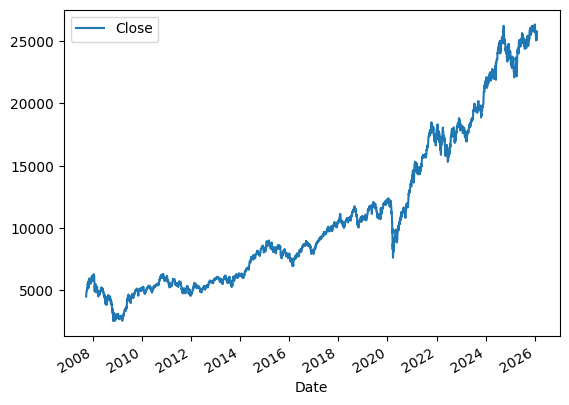

In [154]:
df.plot(y="Close", use_index=True)

In [155]:
del df["Dividends"]
del df["Stock Splits"]

In [156]:
df["Tommorrows Close"] = df["Close"].shift(-1)
df["Target"]=(df["Tommorrows Close"] > df["Close"]).astype(int)
df.loc["2008":]


,Open,High,Low,Close,Volume,Tommorrows Close,Target
Date,,,,,,,
2008-01-01 00:00:00+05:30,6136.750000,6165.350098,6109.850098,6144.350098,0,6179.399902,1
2008-01-02 00:00:00+05:30,6144.700195,6197.000000,6060.850098,6179.399902,0,6178.549805,0
2008-01-03 00:00:00+05:30,6184.250000,6230.149902,6126.399902,6178.549805,0,6274.299805,1
2008-01-04 00:00:00+05:30,6179.100098,6300.049805,6179.100098,6274.299805,0,6279.100098,1
2008-01-07 00:00:00+05:30,6271.000000,6289.799805,6193.350098,6279.100098,0,6287.850098,1
...,...,...,...,...,...,...,...
2026-02-02 00:00:00+05:30,24796.500000,25108.099609,24679.400391,25088.400391,449200,25727.550781,1
2026-02-03 00:00:00+05:30,26308.050781,26341.199219,25641.300781,25727.550781,637300,25776.000000,1
2026-02-04 00:00:00+05:30,25675.050781,25818.550781,25563.949219,25776.000000,429800,25642.800781,0


In [157]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=1)
train = df.iloc[:-100]
test = df.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",10
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metri

In [158]:
from sklearn.metrics import precision_score
import pandas as pd
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)


In [159]:
precision_score(test["Target"], preds)

0.5641025641025641

<Axes: xlabel='Date'>

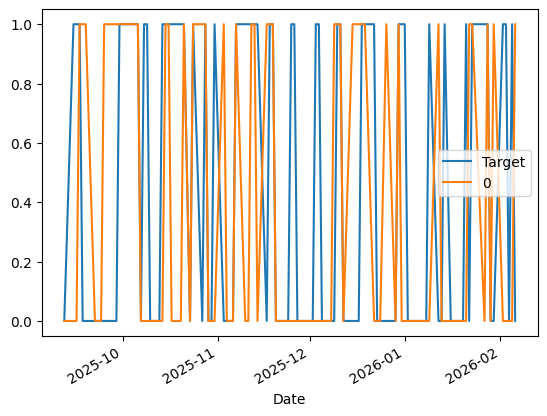

In [160]:
combined  = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [161]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined  = pd.concat([test["Target"], preds], axis=1)
    return combined

In [162]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [163]:
predictions = backtest(df, model, predictors)
predictions["Predictions"].value_counts()

Predictions
0    1400
1     612
Name: count, dtype: int64

In [164]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5522875816993464

In [165]:
predictions["Target"].value_counts()/predictions.shape[0]

Target
1    0.540755
0    0.459245
Name: count, dtype: float64

In [166]:
horizons = [2, 5, 30, 60, 100, 250, 1000]
new_predictors = []
for horizon in horizons:
    rolling_average = df.rolling(horizon).mean()
    ratio_column = f"Close_Ratio_{horizon}"
    df[ratio_column] = df["Close"] / rolling_average["Close"]

    trend_column = f"Close_Trend_{horizon}"
    df[trend_column] = df.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

In [167]:
df.dropna()
df

,Open,High,Low,Close,Volume,Tommorrows Close,Target,Close_Ratio_2,Close_Trend_2,Close_Ratio_5,...,Close_Ratio_30,Close_Trend_30,Close_Ratio_60,Close_Trend_60,Close_Ratio_100,Close_Trend_100,Close_Ratio_250,Close_Trend_250,Close_Ratio_1000,Close_Trend_1000
Date,,,,,,,,,,,,,,,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,4546.200195,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,4732.350098,1,1.005702,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,4747.549805,1,1.020062,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,4837.549805,1,1.001603,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,4932.200195,1,1.009390,2.0,1.035510,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-02-02 00:00:00+05:30,24796.500000,25108.099609,24679.400391,25088.400391,449200,25727.550781,1,0.995393,0.0,0.992844,...,0.974339,12.0,0.970701,26.0,0.978938,49.0,1.013269,123.0,1.184364,525.0
2026-02-03 00:00:00+05:30,26308.050781,26341.199219,25641.300781,25727.550781,637300,25776.000000,1,1.012578,1.0,1.013708,...,0.999276,13.0,0.995291,27.0,1.003503,49.0,1.038652,123.0,1.214108,526.0
2026-02-04 00:00:00+05:30,25675.050781,25818.550781,25563.949219,25776.000000,429800,25642.800781,0,1.000941,2.0,1.012161,...,1.001404,13.0,0.996983,28.0,1.005037,49.0,1.040184,123.0,1.215966,526.0


In [168]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [169]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:, 1]    
    preds[preds >= 0.6] = 1
    preds[preds < 0.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined  = pd.concat([test["Target"], preds], axis=1)
    return combined

In [170]:
predictions = backtest(df, model, new_predictors)

In [171]:
predictions["Predictions"].value_counts()   

Predictions
0.0    1765
1.0     247
Name: count, dtype: int64

In [172]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5789473684210527